In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import sklearn

%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 61,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11937,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
11938,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11939,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11940,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11942 entries, 0 to 11941
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11942 non-null  object 
 1   Мусор             11942 non-null  int64  
 2   dup               11942 non-null  int64  
 3   outlier           11942 non-null  int64  
 4   out_PCA           10119 non-null  float64
 5   Цена              11942 non-null  int64  
 6   Цена_перв         11934 non-null  object 
 7   LN(Цена)          11942 non-null  float64
 8   BC(Цена)          11934 non-null  float64
 9   Цена_перв.1       1807 non-null   float64
 10  Цена(кв.м)        11942 non-null  float64
 11  Цена(кв.м)_ln     11938 non-null  float64
 12  Прогноз           10065 non-null  float64
 13  кв.м              10057 non-null  float64
 14  MAE               10057 non-null  float64
 15  MAPE              10057 non-null  float64
 16  Исп               909 non-null    object

In [4]:
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 61,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
9535,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9536,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9537,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [5]:
df.columns

Index(['ID', 'Мусор', 'dup', 'outlier', 'out_PCA', 'Цена', 'Цена_перв',
       'LN(Цена)', 'BC(Цена)', 'Цена_перв.1', 'Цена(кв.м)', 'Цена(кв.м)_ln',
       'Прогноз', 'кв.м', 'MAE', 'MAPE', 'Исп', 'Комм', 'ОПлощадь', 'Этаж_1',
       'Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_1', 'ГП_1', 'ГП_2',
       'Неточности', 'ГП', 'Unnamed: 28', 'Unnamed: 29', 'Разница', 'Испол',
       'Ремонт_1', 'Ремонт_2', 'Раст_центр_1', 'Раст_центр_2', 'Раст_метро_1',
       'Раст_метро_2', 'Районы_1', 'Районы_2', 'Районы_3', 'Районы_4',
       'Районы_5', 'Medians', 'ЖК_БД', 'ЖК_БД_ч', 'Многоуровневость',
       'Терраса', 'Вид_1', 'Вид_2', 'DB', 'KM', 'Аварийноть', 'Проверка',
       'Инфо', 'Адрес_1', 'Адрес_2', 'Адрес_Ya', 'Долгота', 'Широта',
       'Сцепка_к', 'Unnamed: 61', 'ПОИСК', 'Текст', 'Ремонт', 'Общая площадь',
       'Год постройки', 'Этаж/Этажность', 'Ссылка'],
      dtype='object')

In [6]:
df = df[['ID', 'Цена', 'Цена(кв.м)', 'кв.м', 'MAPE', 'ОПлощадь', 'Этаж_1',
           'Этаж_2', 'Этаж_4', 'Этажность_1', 'ГП_2',
          'Ремонт_2', 'Раст_центр_1', 'Раст_центр_2', 'Раст_метро_1',
           'Раст_метро_2', 'Районы_2', 'Районы_5', 'ЖК_БД', 'ЖК_БД_ч', 'Многоуровневость',
           'Терраса', 'Вид_1', 'Вид_2', 'Адрес_Ya', 
           'Сцепка_к']]

In [7]:
df['Районы_2'].isnull().sum()  #пропущенные значения

0

In [8]:
df['Районы_2'].unique()

array(['Соцгород', 'Усады', 'Клыковка_Дальний', 'Караваево',
       'Вблизи_центра', 'Солнечный_Город', 'Горки', 'Калуга_Аметьево',
       'Залесный', 'Азино', 'Городские_поселки',
       'Старотатарская_Суконная', 'Жилплощадка_Новое_Караваево',
       'Зоопарк', 'Старый_Ново_Савиновский', 'Царево', 'Ягодная_слобода',
       'Куюки', 'Кварталы', 'Левый_Берег', 'Танкодром',
       'Квартал_56_Третий', 'Свердлова', 'Царицыно', 'Центр', 'Левченко',
       'Пороховая_слобода', 'Речной_Порт', 'Дербышки',
       'Красная_горка_Юдино', 'Квартал_42', 'Адмиралтейская_слобода',
       'поселок_Урицкого', 'Высокая_гора', 'Сокуры', 'Осиново'],
      dtype=object)

In [9]:
ds = 'Азино'

df_1 = df[df['Районы_2'] == ds]
len(df_1)

491

In [10]:
df_1['Ремонт_2'].value_counts(sort = True, ascending = False)

Ремонт_2
косметический         252
современный_ремонт    156
требует_ремонта        43
дизайнерский           27
предчистовая           13
Name: count, dtype: int64

In [11]:
df_1['ГП_2'].value_counts(sort = True, ascending = False).head(20)

ГП_2
2000.0    47
2003.0    45
1999.0    36
2004.0    30
2007.0    30
2002.0    29
1997.0    25
2010.0    22
2006.0    22
1998.0    21
2021.0    20
2011.0    16
1996.0    15
1988.0    15
1992.0    13
1989.0    12
1991.0    12
2008.0    12
2001.0    11
2012.0     9
Name: count, dtype: int64

In [82]:
distr = 'предчистовая'
year = 2021

df_1_d = df_1[(df_1['Ремонт_2'] == distr) & (df_1['ГП_2'] == year)]
#df_4['ГП_2'].unique()

#df_4['Цена(кв.м)']
len(df_1_d)

9

У всех квартир одинаковый год 2010.0!


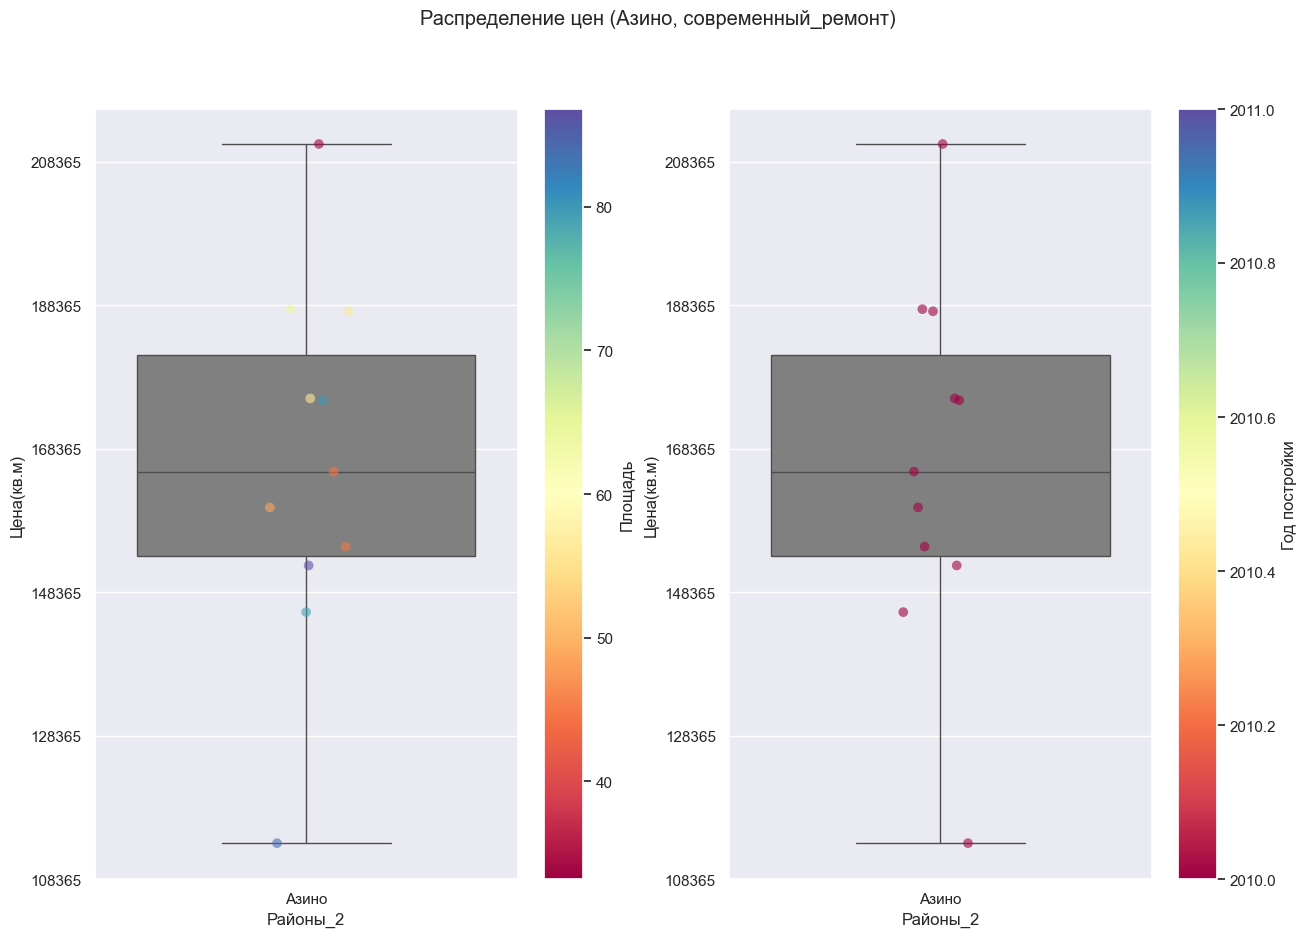

In [42]:
from matplotlib.cm import ScalarMappable

n_colors_s = len(df_1_d[df_1_d['Ремонт_2'] == distr]['ОПлощадь'].value_counts(sort = True, ascending = False))
n_colors_y = len(df_1_d[df_1_d['Ремонт_2'] == distr]['ГП_2'].value_counts(sort = True, ascending = False))


mini_s = df_1_d[df_1_d['Ремонт_2'] == distr]['ОПлощадь'].min()
maxi_s = df_1_d[df_1_d['Ремонт_2'] == distr]['ОПлощадь'].max()
mini_y = df_1_d[df_1_d['Ремонт_2'] == distr]['ГП_2'].min()
maxi_y = df_1_d[df_1_d['Ремонт_2'] == distr]['ГП_2'].max()

if maxi_y == mini_y:
    mini_y = mini_y
    maxi_y = maxi_y + 1
    print(f'У всех квартир одинаковый год {mini_y}!')
    
if maxi_s == mini_s:
    maxi_s = mini_s
    maxi_s = mini_s + 1
    print(f'У всех квартир одинаковая площадь {mini_s}!')

norm_s = plt.Normalize(
                       mini_s, 
                       maxi_s
                       )

norm_y = plt.Normalize(
                       mini_y, 
                       maxi_y
                       )

cmap = plt.get_cmap("Spectral") #Spectral, seismic

#cpal_s = sns.color_palette('Spectral', n_colors = n_colors_s, desat = 1)
#cpal_y = sns.color_palette('Spectral', n_colors = n_colors_y, desat = 1)

fig, ax = plt.subplots(1, 2, figsize = (15, 10)) #1 строка и 2 столбика, figsize = ширина и высота, sharex=True,

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "Цена(кв.м)", 
            data = df_1_d[df_1_d['Ремонт_2'] == distr],
            color = 'grey',
            ax = ax[0]
            ) 
  
#создаем strip plot для площади
sns.stripplot(
              x = "Районы_2", 
              y = "Цена(кв.м)",
              hue = "ОПлощадь",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_s(df_1_d[df_1_d['Ремонт_2'] == distr]['ОПлощадь']))], #'black',
              alpha = 0.6, 
              data = df_1_d[df_1_d['Ремонт_2'] == distr],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[0]
              )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm_s = ScalarMappable(norm = norm_s, cmap = cmap)
sm_s.set_array([])

fig.colorbar(
             sm_s, 
             ax = ax[0], 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "Цена(кв.м)", 
            data = df_1_d[df_1_d['Ремонт_2'] == distr],
            color = 'grey',
            ax = ax[1]
            ) 

#создаем strip plot для ГП
sns.stripplot(
              x = "Районы_2", 
              y = "Цена(кв.м)",
              hue = "ГП_2",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_y(df_1_d[df_1_d['Ремонт_2'] == distr]['ГП_2']))], #'black',
              alpha = 0.6, 
              data = df_1_d[df_1_d['Ремонт_2'] == distr],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[1]
              )
#sns.despine() #удаляет полосы с графика

sm_y = ScalarMappable(norm = norm_y, cmap = cmap)
sm_y.set_array([])

fig.colorbar(
             sm_y, 
             ax = ax[1], 
             orientation = 'vertical', #horizontal
             label = 'Год постройки'
             )

ax[0].get_legend().remove() #отключаем легенду у площади
ax[1].get_legend().remove() #отключаем легенду у ГП

#plt.xticks(np.arange(0,151,25))
ax[0].set_yticks(np.arange(df_1_d[df_1_d['Ремонт_2'] == distr]['Цена(кв.м)'].min() - 5000, 
                           df_1_d[df_1_d['Ремонт_2'] == distr]['Цена(кв.м)'].max() + 5000, 20000))
ax[1].set_yticks(np.arange(df_1_d[df_1_d['Ремонт_2'] == distr]['Цена(кв.м)'].min() - 5000, 
                           df_1_d[df_1_d['Ремонт_2'] == distr]['Цена(кв.м)'].max() + 5000, 20000))

fig.suptitle(f'Распределение цен ({ds}, {distr})')
#plt.title("Распределение цен (западный обход, предчистовая)", size = 15)
#plt.xlabel("Район", size = 14)
#plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

<Axes: xlabel='ОПлощадь', ylabel='Цена(кв.м)'>

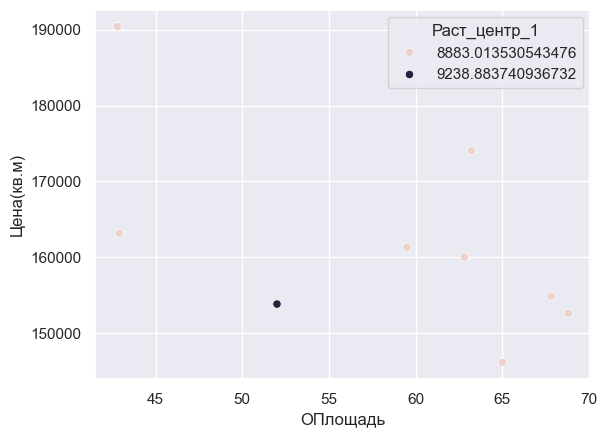

In [113]:
sns.scatterplot(y = 'Цена(кв.м)', 
                x = 'ОПлощадь', 
                hue = 'Раст_центр_1',
                data = df_1_d
               )
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [47]:
g = df_1_d[df_1_d['Ремонт_2'] == distr]
g[(g['Цена(кв.м)'] > 200000) & (g['Цена(кв.м)'] < 220000)]

,ID,Цена,Цена(кв.м),кв.м,MAPE,ОПлощадь,Этаж_1,Этаж_2,Этаж_4,Этажность_1,...,Районы_2,Районы_5,ЖК_БД,ЖК_БД_ч,Многоуровневость,Терраса,Вид_1,Вид_2,Адрес_Ya,Сцепка_к
7275,167_этажи,6999000,210813.253012,199823.073886,0.052132,33.2,5.0,средний,этажи_2-5,10.0,...,Азино,4.0,нет,1,0,0,нет,0,"Россия, Республика Татарстан, Казань, Минская ...",49.241871 55.772831


In [108]:
idd = "431_avito, 337_avito, 626_avito, 496_avito, 1032_avito, 1942_этажи, 207_avito, 730_avito, 878_этажи, 1609_avito, 1211_avito, 1613_этажи, \
2845_этажи, 134_этажи, 2466_этажи, 1052_avito, 1788_avito, 1143_avito, 2683_этажи, 7906_avito, 1352_avito, 5383_avito, 4467_avito, \
4925_avito, 3041_avito, 5768_avito, 3050_avito, 5605_avito, 4437_avito, 4632_avito, 5845_avito, 9288_avito, 1963_этажи, 5276_avito, \
3598_avito, 5638_avito, 3517_avito, 5632_avito, 5016_avito, 5168_avito, 1763_этажи, 2932_avito, 2511_avito, 2944_avito, 2152_avito, \
2217_avito, 2734_avito, 115_этажи, 1939_этажи, 2074_avito, 8760_avito, 2910_avito, 2156_avito, 2855_avito, 8942_avito, 1842_этажи, \
2552_avito, 2598_avito, 2684_avito, 2880_avito, 9000_avito, 1896_этажи, 8413_avito, 2343_avito, 2378_avito, 8691_avito, 2645_avito, \
7023_avito, 7416_avito, 6610_avito, 9274_avito, 6756_avito, 9187_avito, 1156_этажи, 7508_avito, 3320_этажи, 7654_avito, 7493_avito, \
7579_avito, 7676_avito, 7124_avito, 3013_этажи, 2878_этажи, 118_этажи, 2241_этажи, 96_этажи, 3570_avito, 4112_avito, 2665_этажи, \
3712_avito, 3608_avito, 4302_avito, 288_этажи, 1506_avito, 3884_avito, 4002_avito, 4870_avito, 3197_avito, 3779_avito, 3929_avito, \
4024_avito, 4486_avito, 4537_avito, 5896_avito, 3728_avito, 2635_этажи, 3630_avito, 1624_этажи, 7835_avito, 1177_avito, 8237_avito, \
2352_этажи, 7847_avito, 8038_avito, 1854_avito, 2120_этажи, 1169_avito, 473_avito, 950_avito, 7898_avito, 932_avito, 924_этажи, 7901_avito, \
5044_avito, 3403_avito, 2257_этажи, 5691_avito, 3159_avito, 3385_avito, 3512_avito, 3646_avito, 3784_avito, 3830_avito, 3885_avito, \
3919_avito, 3986_avito, 4600_avito, 5123_avito, 7716_avito, 4072_avito, 3154_avito, 3573_avito, 3678_avito, 4127_avito, 3363_avito, \
3724_avito, 5852_avito, 3419_avito, 4064_avito, 4194_avito, 4323_avito, 4433_avito, 6108_avito, 683_avito, 9297_avito, 31_avito, \
355_avito, 712_avito, 1952_avito, 785_avito, 836_avito, 399_avito, 1696_avito, 891_этажи, 892_этажи, 61_avito, 406_avito, 608_avito, \
1526_avito, 7622_avito, 390_этажи, 6688_avito, 6849_avito, 7149_avito, 7181_avito, 7203_avito, 1501_avito, 2372_этажи, 83_avito, \
433_avito, 515_avito, 582_avito, 1829_avito, 347_этажи, 1816_avito, 8083_avito, 42_avito, 1017_avito, 378_avito, 735_avito, 2518_этажи, \
3993_avito, 4155_avito, 5883_avito, 4196_avito, 4157_avito, 4295_avito, 5807_avito, 3477_avito, 542_этажи, 2515_этажи, 3497_avito, \
3992_avito, 6761_avito, 6856_avito, 7115_avito, 7194_avito, 7303_avito, 7344_avito, 7550_avito, 7681_avito, 3514_этажи, 3517_этажи, \
3522_этажи, 3524_этажи, 3525_этажи, 3526_этажи, 3528_этажи, 3529_этажи, 3530_этажи, 4648_avito, 7305_avito, 239_этажи, 4857_avito, \
805_этажи, 5091_avito, 3905_avito, 2191_этажи, 3039_этажи, 2191_этажи, 4412_avito, 4496_avito, 5585_avito, 3088_avito, 3202_avito, \
400_этажи, 4045_avito, 4066_avito, 4885_avito, 4885_avito, 5038_avito, 1820_этажи, 3108_avito, 3217_avito, 3478_avito, 3038_avito, \
5128_avito, 6032_avito, 5134_avito, 1416_этажи, 3123_avito, 94_этажи, 5504_avito, 3273_avito, 3572_avito, 4493_avito, 2020_этажи, \
4947_avito, 2923_этажи, 372_avito, 868_avito, 1342_этажи, 8004_avito, 1313_avito, 2395_этажи, 273_avito, 1738_avito, 8146_avito, \
1546_этажи, 732_avito, 179_avito, 1469_этажи, 1342_avito, 8034_avito, 1823_avito, 7909_avito, 1090_avito, 800_avito, 14_avito, 937_avito, 937_avito"
idd

'431_avito, 337_avito, 626_avito, 496_avito, 1032_avito, 1942_этажи, 207_avito, 730_avito, 878_этажи, 1609_avito, 1211_avito, 1613_этажи, 2845_этажи, 134_этажи, 2466_этажи, 1052_avito, 1788_avito, 1143_avito, 2683_этажи, 7906_avito, 1352_avito, 5383_avito, 4467_avito, 4925_avito, 3041_avito, 5768_avito, 3050_avito, 5605_avito, 4437_avito, 4632_avito, 5845_avito, 9288_avito, 1963_этажи, 5276_avito, 3598_avito, 5638_avito, 3517_avito, 5632_avito, 5016_avito, 5168_avito, 1763_этажи, 2932_avito, 2511_avito, 2944_avito, 2152_avito, 2217_avito, 2734_avito, 115_этажи, 1939_этажи, 2074_avito, 8760_avito, 2910_avito, 2156_avito, 2855_avito, 8942_avito, 1842_этажи, 2552_avito, 2598_avito, 2684_avito, 2880_avito, 9000_avito, 1896_этажи, 8413_avito, 2343_avito, 2378_avito, 8691_avito, 2645_avito, 7023_avito, 7416_avito, 6610_avito, 9274_avito, 6756_avito, 9187_avito, 1156_этажи, 7508_avito, 3320_этажи, 7654_avito, 7493_avito, 7579_avito, 7676_avito, 7124_avito, 3013_этажи, 2878_этажи, 118_этажи, 2

In [109]:
idd = ' '.join('"{}"'.format(word) for word in idd.split(', '))
idd

'"431_avito" "337_avito" "626_avito" "496_avito" "1032_avito" "1942_этажи" "207_avito" "730_avito" "878_этажи" "1609_avito" "1211_avito" "1613_этажи" "2845_этажи" "134_этажи" "2466_этажи" "1052_avito" "1788_avito" "1143_avito" "2683_этажи" "7906_avito" "1352_avito" "5383_avito" "4467_avito" "4925_avito" "3041_avito" "5768_avito" "3050_avito" "5605_avito" "4437_avito" "4632_avito" "5845_avito" "9288_avito" "1963_этажи" "5276_avito" "3598_avito" "5638_avito" "3517_avito" "5632_avito" "5016_avito" "5168_avito" "1763_этажи" "2932_avito" "2511_avito" "2944_avito" "2152_avito" "2217_avito" "2734_avito" "115_этажи" "1939_этажи" "2074_avito" "8760_avito" "2910_avito" "2156_avito" "2855_avito" "8942_avito" "1842_этажи" "2552_avito" "2598_avito" "2684_avito" "2880_avito" "9000_avito" "1896_этажи" "8413_avito" "2343_avito" "2378_avito" "8691_avito" "2645_avito" "7023_avito" "7416_avito" "6610_avito" "9274_avito" "6756_avito" "9187_avito" "1156_этажи" "7508_avito" "3320_этажи" "7654_avito" "7493_a

In [110]:
idd.split('" "')

['"431_avito',
 '337_avito',
 '626_avito',
 '496_avito',
 '1032_avito',
 '1942_этажи',
 '207_avito',
 '730_avito',
 '878_этажи',
 '1609_avito',
 '1211_avito',
 '1613_этажи',
 '2845_этажи',
 '134_этажи',
 '2466_этажи',
 '1052_avito',
 '1788_avito',
 '1143_avito',
 '2683_этажи',
 '7906_avito',
 '1352_avito',
 '5383_avito',
 '4467_avito',
 '4925_avito',
 '3041_avito',
 '5768_avito',
 '3050_avito',
 '5605_avito',
 '4437_avito',
 '4632_avito',
 '5845_avito',
 '9288_avito',
 '1963_этажи',
 '5276_avito',
 '3598_avito',
 '5638_avito',
 '3517_avito',
 '5632_avito',
 '5016_avito',
 '5168_avito',
 '1763_этажи',
 '2932_avito',
 '2511_avito',
 '2944_avito',
 '2152_avito',
 '2217_avito',
 '2734_avito',
 '115_этажи',
 '1939_этажи',
 '2074_avito',
 '8760_avito',
 '2910_avito',
 '2156_avito',
 '2855_avito',
 '8942_avito',
 '1842_этажи',
 '2552_avito',
 '2598_avito',
 '2684_avito',
 '2880_avito',
 '9000_avito',
 '1896_этажи',
 '8413_avito',
 '2343_avito',
 '2378_avito',
 '8691_avito',
 '2645_avito',
 '7

In [111]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Outliers.xlsx')
pd.DataFrame(idd.split('" "')).to_excel(writer, 'out')
writer._save()

C:\Users\Silm\AppData\Local\Temp\ipykernel_10720\966668832.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  pd.DataFrame(idd.split('" "')).to_excel(writer, 'out')


Третий: 431_avito, 337_avito, 626_avito, 496_avito, 1032_avito, 1942_этажи, 207_avito, 730_avito, 878_этажи, 1609_avito, 1211_avito, 1613_этажи, 2845_этажи, 134_этажи, 2466_этажи, 1052_avito, 1788_avito, 1143_avito, 2683_этажи, 7906_avito, 1352_avito, 5383_avito, 4467_avito, 4925_avito, 3041_avito, 5768_avito, 3050_avito, 5605_avito, 4437_avito, 4632_avito, 5845_avito, 9288_avito, 1963_этажи, 5276_avito, 3598_avito, 5638_avito, 3517_avito, 5632_avito, 5016_avito, 5168_avito, 1763_этажи, 2932_avito, 2511_avito, 2944_avito, 2152_avito, 2217_avito, 2734_avito, 115_этажи, 1939_этажи, 2074_avito, 8760_avito, 2910_avito, 2156_avito, 2855_avito, 8942_avito, 1842_этажи, 2552_avito, 2598_avito, 2684_avito, 2880_avito, 9000_avito, 1896_этажи, 8413_avito, 2343_avito, 2378_avito, 8691_avito, 2645_avito, 7023_avito, 7416_avito, 6610_avito, 9274_avito, 6756_avito, 9187_avito, 1156_этажи, 7508_avito, 3320_этажи, 7654_avito, 7493_avito, 7579_avito, 7676_avito, 7124_avito

Осиново: 3013_этажи, 2878_этажи, 118_этажи, 2241_этажи, 96_этажи

Залесный: 3570_avito, 4112_avito, 2665_этажи, 3712_avito, 3608_avito, 4302_avito, 288_этажи, 1506_avito, 3884_avito, 4002_avito, 4870_avito, 3197_avito, 3779_avito, 3929_avito, 4024_avito, 4486_avito, 4537_avito, 5896_avito, 3728_avito, 2635_этажи, 3630_avito, 1624_этажи, 7835_avito, 1177_avito, 8237_avito, 2352_этажи, 7847_avito, 8038_avito, 1854_avito, 2120_этажи, 1169_avito, 473_avito, 950_avito, 7898_avito, 932_avito, 924_этажи, 7901_avito, 5044_avito

Куюки: 3403_avito, 2257_этажи, 5691_avito, 3159_avito, 3385_avito, 3512_avito, 3646_avito, 3784_avito, 3830_avito, 3885_avito, 3919_avito, 3986_avito, 4600_avito, 5123_avito, 7716_avito, 4072_avito, 3154_avito, 3573_avito, 3678_avito, 4127_avito, 3363_avito, 3724_avito, 5852_avito, 3419_avito, 4064_avito, 4194_avito, 4323_avito, 4433_avito, 6108_avito, 683_avito, 9297_avito, 31_avito, 355_avito, 712_avito, 1952_avito, 785_avito, 836_avito, 399_avito, 1696_avito, 891_этажи, 892_этажи, 61_avito, 406_avito, 608_avito, 1526_avito, 7622_avito, 390_этажи, 6688_avito, 6849_avito, 7149_avito, 7181_avito, 7203_avito

Царево: 1501_avito, 2372_этажи, 83_avito, 433_avito, 515_avito, 582_avito, 1829_avito, 347_этажи, 1816_avito, 8083_avito, 42_avito, 1017_avito, 378_avito, 735_avito, 2518_этажи, 3993_avito, 4155_avito, 5883_avito, 4196_avito, 4157_avito, 4295_avito, 5807_avito, 3477_avito, 542_этажи, 2515_этажи, 3497_avito, 3992_avito, 6761_avito, 6856_avito, 7115_avito, 7194_avito, 7303_avito, 7344_avito, 7550_avito, 7681_avito, 3514_этажи, 3517_этажи, 3522_этажи, 3524_этажи, 3525_этажи, 3526_этажи, 3528_этажи, 3529_этажи, 3530_этажи  

Азино: 4648_avito, 7305_avito, 239_этажи, 4857_avito, 805_этажи, 5091_avito, 3905_avito, 2191_этажи, 3039_этажи, 2191_этажи, 4412_avito, 4496_avito, 5585_avito, 3088_avito, 3202_avito, 400_этажи, 4045_avito, 4066_avito, 4885_avito, 4885_avito, 5038_avito, 1820_этажи, 3108_avito, 3217_avito, 3478_avito, 3038_avito, 5128_avito, 6032_avito, 5134_avito, 1416_этажи, 3123_avito, 94_этажи, 5504_avito, 3273_avito, 3572_avito, 4493_avito, 2020_этажи, 4947_avito, 2923_этажи, 372_avito, 868_avito, 1342_этажи, 8004_avito, 1313_avito, 2395_этажи, 273_avito, 1738_avito, 8146_avito, 1546_этажи, 732_avito, 179_avito, 1469_этажи, 1342_avito, 8034_avito, 1823_avito, 7909_avito, 1090_avito, 800_avito, 14_avito, 937_avito, 937_avito

#  Детализация по сцепке_к

In [187]:
df_1['Сцепка_к'].value_counts(sort = True, ascending = False).head(20)

Сцепка_к
49.146452 55.816793    42
49.146461 55.81871     34
49.136364 55.813364    33
49.113457 55.823909    30
49.139158 55.814457    23
49.145248 55.821148    22
49.143218 55.818736    18
49.144269 55.822706    16
49.126141 55.8213      14
49.109145 55.819778    10
49.141332 55.81561     10
49.144817 55.820051     9
49.152542 55.824329     7
49.138053 55.815094     7
49.143119 55.822756     7
49.099461 55.826529     7
49.134612 55.818756     6
49.138053 55.814796     6
49.13525 55.824769      6
49.109603 55.817643     6
Name: count, dtype: int64

In [188]:
df_1_d = df_1[(df_1['Сцепка_к'] == '49.146452 55.816793') | 
               (df_1['Сцепка_к'] == '49.146461 55.81871') | 
               (df_1['Сцепка_к'] == '49.143218 55.818736')
              ]
df_1_d['Сцепка_к'].unique()

array(['49.146461 55.81871', '49.146452 55.816793', '49.143218 55.818736'],
      dtype=object)

In [189]:
df_1_d.head(3)

,ID,Цена,Цена(кв.м),кв.м,MAPE,ОПлощадь,Этаж_1,Этаж_2,Этаж_4,Этажность_1,...,Районы_2,Районы_5,ЖК_БД,ЖК_БД_ч,Многоуровневость,Терраса,Вид_1,Вид_2,Адрес_Ya,Сцепка_к
658,684_avito,13490000,287633.262260,288072.144178,-0.001526,46.9,17.0,средний,этажи_11-25,22.0,...,Квартал_56_Третий,7.0,нет,1,0,0,нет,0,"Россия, Республика Татарстан, Казань, Чистопол...",49.146461 55.81871
923,970_avito,13790000,293404.255319,287459.224722,0.020262,47.0,17.0,средний,этажи_11-25,22.0,...,Квартал_56_Третий,7.0,нет,1,0,0,нет,0,"Россия, Республика Татарстан, Казань, Чистопол...",49.146461 55.81871
1807,1914_avito,20500000,271164.021164,258958.827337,0.045010,75.6,5.0,средний,этажи_2-5,22.0,...,Квартал_56_Третий,7.0,нет,1,0,0,нет,0,"Россия, Республика Татарстан, Казань, Чистопол...",49.146461 55.81871


In [190]:
df_1_d['Ремонт_2'].value_counts(sort = True, ascending = False)

Ремонт_2
предчистовая          40
дизайнерский          37
современный_ремонт     8
косметический          7
без_отделки            1
требует_ремонта        1
Name: count, dtype: int64

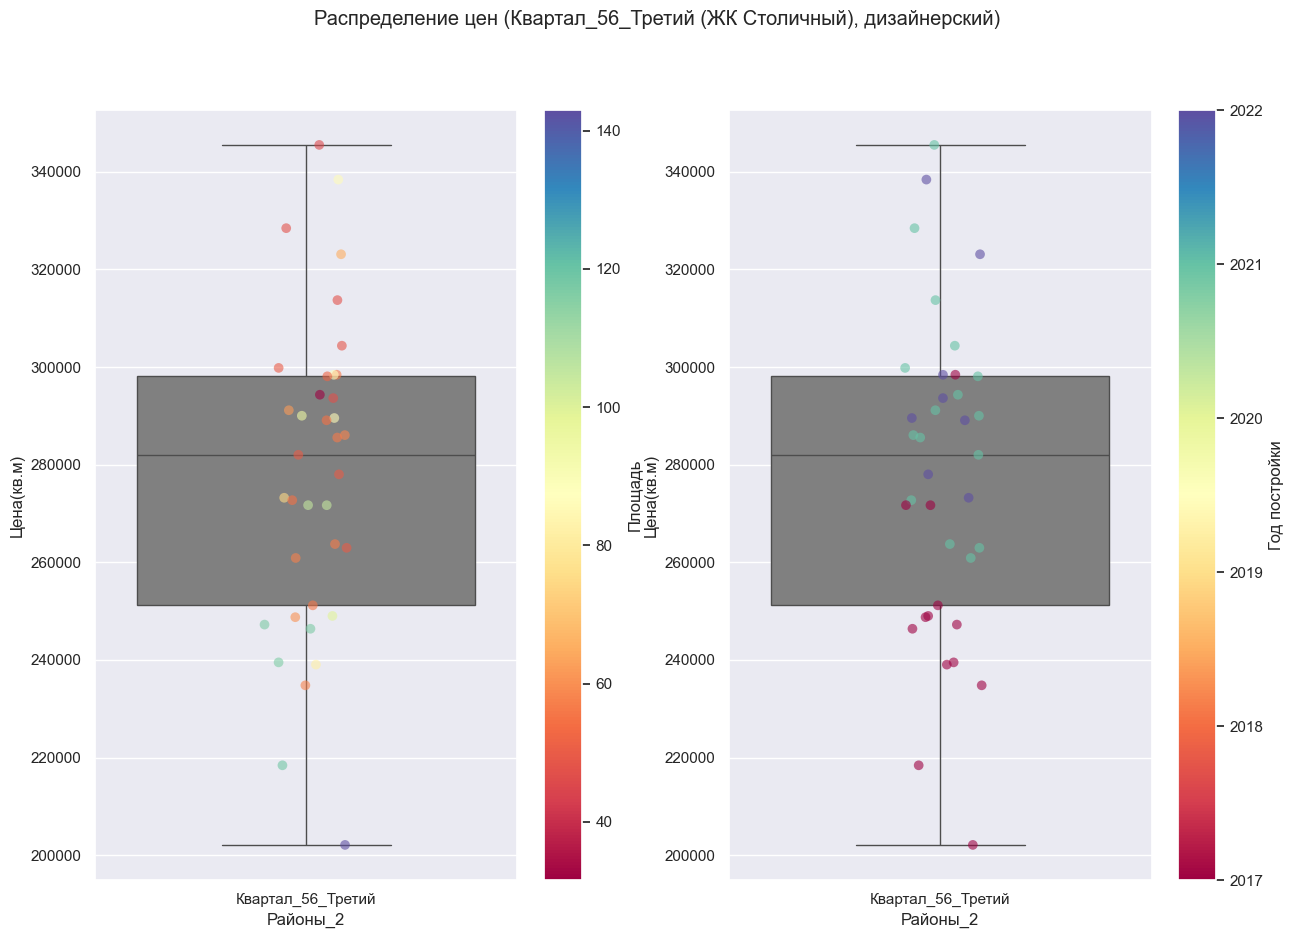

In [191]:
from matplotlib.cm import ScalarMappable

n_colors_s = len(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь'].value_counts(sort = True, ascending = False))
n_colors_y = len(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2'].value_counts(sort = True, ascending = False))


mini_s = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь'].min()
maxi_s = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь'].max()
mini_y = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2'].min()
maxi_y = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2'].max()

if maxi_y == mini_y:
    mini_y = mini_y
    maxi_y = maxi_y + 1
    print(f'У всех квартир одинаковый год {mini_y}!')
    
if maxi_s == mini_s:
    maxi_s = mini_s
    maxi_s = mini_s + 1
    print(f'У всех квартир одинаковая площадь {mini_s}!')

norm_s = plt.Normalize(
                       mini_s, 
                       maxi_s
                       )

norm_y = plt.Normalize(
                       mini_y, 
                       maxi_y
                       )

cmap = plt.get_cmap("Spectral") #Spectral, seismic

#cpal_s = sns.color_palette('Spectral', n_colors = n_colors_s, desat = 1)
#cpal_y = sns.color_palette('Spectral', n_colors = n_colors_y, desat = 1)

fig, ax = plt.subplots(1, 2, figsize = (15, 10)) #1 строка и 2 столбика, figsize = ширина и высота, sharex=True,

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "Цена(кв.м)", 
            data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
            color = 'grey',
            ax = ax[0]
            ) 
  
#создаем strip plot для площади
sns.stripplot(
              x = "Районы_2", 
              y = "Цена(кв.м)",
              hue = "ОПлощадь",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_s(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь']))], #'black',
              alpha = 0.6, 
              data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[0]
              )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm_s = ScalarMappable(norm = norm_s, cmap = cmap)
sm_s.set_array([])

fig.colorbar(
             sm_s, 
             ax = ax[0], 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "Цена(кв.м)", 
            data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
            color = 'grey',
            ax = ax[1]
            ) 

#создаем strip plot для ГП
sns.stripplot(
              x = "Районы_2", 
              y = "Цена(кв.м)",
              hue = "ГП_2",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_y(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2']))], #'black',
              alpha = 0.6, 
              data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[1]
              )
#sns.despine() #удаляет полосы с графика

sm_y = ScalarMappable(norm = norm_y, cmap = cmap)
sm_y.set_array([])

fig.colorbar(
             sm_y, 
             ax = ax[1], 
             orientation = 'vertical', #horizontal
             label = 'Год постройки'
             )

ax[0].get_legend().remove() #отключаем легенду у площади
ax[1].get_legend().remove() #отключаем легенду у ГП

#plt.xticks(np.arange(0,151,25))
ax[0].set_yticks(np.arange(200000, 360000, 20000))
ax[1].set_yticks(np.arange(200000, 360000, 20000))

fig.suptitle('Распределение цен (Квартал_56_Третий (ЖК Столичный), дизайнерский)')
#plt.title("Распределение цен (западный обход, предчистовая)", size = 15)
#plt.xlabel("Район", size = 14)
#plt.ylabel("Цена(кв.м)", size = 14)
plt.show()

In [192]:
g = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']
g[(g['Цена(кв.м)'] > 230000) & (g['Цена(кв.м)'] < 239300)]

,ID,Цена,Цена(кв.м),кв.м,MAPE,ОПлощадь,Этаж_1,Этаж_2,Этаж_4,Этажность_1,...,Районы_2,Районы_5,ЖК_БД,ЖК_БД_ч,Многоуровневость,Терраса,Вид_1,Вид_2,Адрес_Ya,Сцепка_к
1969,2142_avito,13500000,234782.608696,266610.953658,-0.135565,57.5,5.0,средний,этажи_2-5,22.0,...,Квартал_56_Третий,7.0,нет,1,0,0,нет,0,"Россия, Республика Татарстан, Казань, Чистопол...",49.143218 55.818736
2550,2846_avito,19600000,239024.390244,242902.836424,-0.016226,82.0,13.0,средний,этажи_11-25,22.0,...,Квартал_56_Третий,7.0,нет,1,0,0,нет,0,"Россия, Республика Татарстан, Казань, Чистопол...",49.143218 55.818736


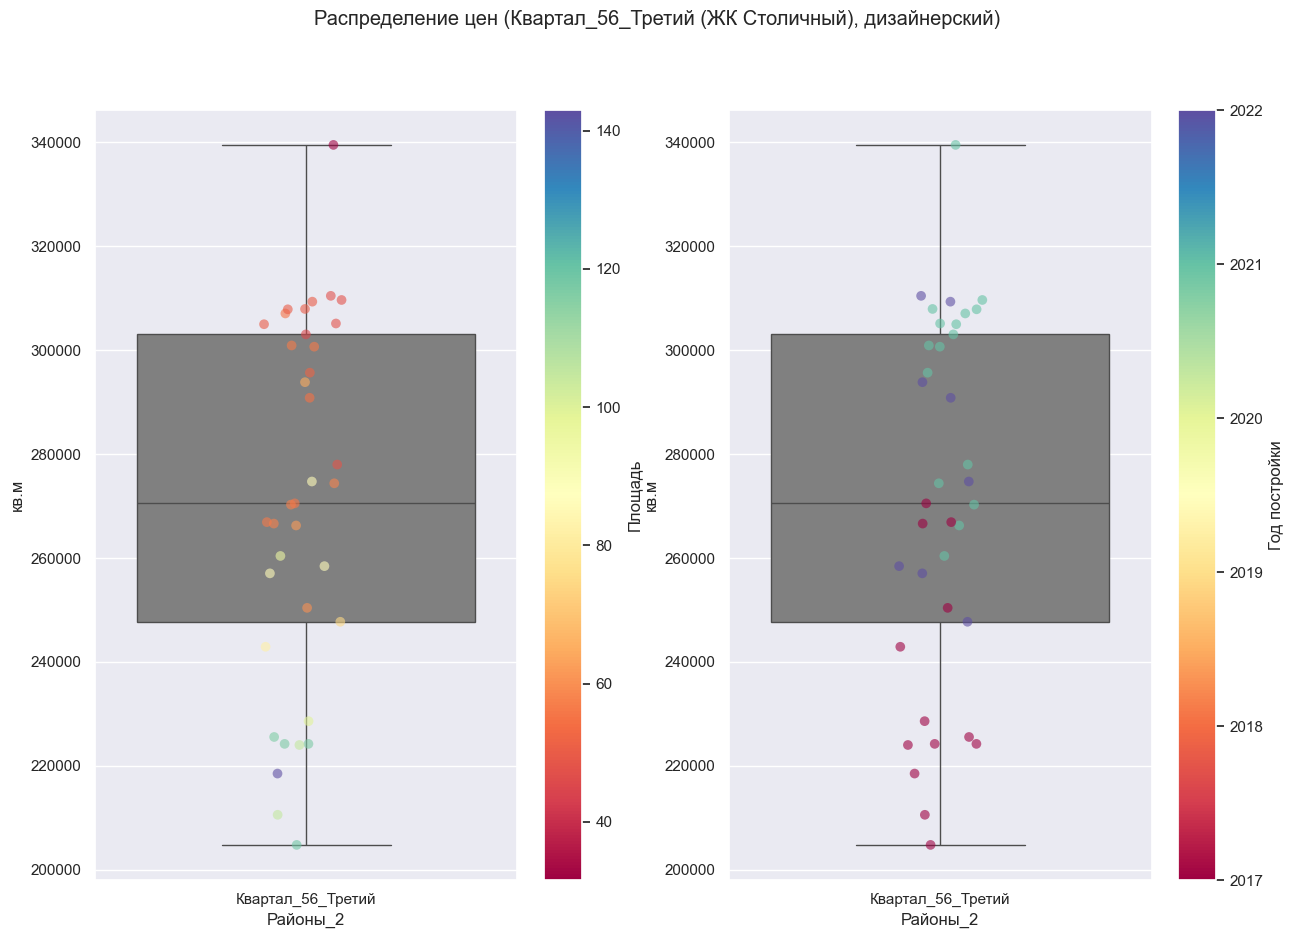

In [193]:
from matplotlib.cm import ScalarMappable

n_colors_s = len(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь'].value_counts(sort = True, ascending = False))
n_colors_y = len(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2'].value_counts(sort = True, ascending = False))


mini_s = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь'].min()
maxi_s = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь'].max()
mini_y = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2'].min()
maxi_y = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2'].max()

if maxi_y == mini_y:
    mini_y = mini_y
    maxi_y = maxi_y + 1
    print(f'У всех квартир одинаковый год {mini_y}!')
    
if maxi_s == mini_s:
    maxi_s = mini_s
    maxi_s = mini_s + 1
    print(f'У всех квартир одинаковая площадь {mini_s}!')

norm_s = plt.Normalize(
                       mini_s, 
                       maxi_s
                       )

norm_y = plt.Normalize(
                       mini_y, 
                       maxi_y
                       )

cmap = plt.get_cmap("Spectral") #Spectral, seismic

#cpal_s = sns.color_palette('Spectral', n_colors = n_colors_s, desat = 1)
#cpal_y = sns.color_palette('Spectral', n_colors = n_colors_y, desat = 1)

fig, ax = plt.subplots(1, 2, figsize = (15, 10)) #1 строка и 2 столбика, figsize = ширина и высота, sharex=True,

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "кв.м", 
            data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
            color = 'grey',
            ax = ax[0]
            ) 
  
#создаем strip plot для площади
sns.stripplot(
              x = "Районы_2", 
              y = "кв.м",
              hue = "ОПлощадь",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_s(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ОПлощадь']))], #'black',
              alpha = 0.6, 
              data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[0]
              )
#sns.despine() #удаляет полосы с графика

#добавляем цветовую шкалу
sm_s = ScalarMappable(norm = norm_s, cmap = cmap)
sm_s.set_array([])

fig.colorbar(
             sm_s, 
             ax = ax[0], 
             orientation = 'vertical', #horizontal
             label = 'Площадь'
             )

#cbar.ax.set_title("scale")

#создаем boxplot
sns.boxplot(
            x = "Районы_2", 
            y = "кв.м", 
            data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
            color = 'grey',
            ax = ax[1]
            ) 

#создаем strip plot для ГП
sns.stripplot(
              x = "Районы_2", 
              y = "кв.м",
              hue = "ГП_2",
              #hue_norm = (mini, maxi), #делает нормализацию от мин до макс, как в norm выше
              #orient = "h",
              #col = "day",       #тут можно указать районы и не сортировать их
              color = [cmap(norm_y(df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский']['ГП_2']))], #'black',
              alpha = 0.6, 
              data = df_1_d[df_1_d['Ремонт_2'] == 'дизайнерский'],
              #jitter = (0, 0.65, 0.05), #True/False
              #linewidth = 2,
              #marker = '*',
              palette = 'Spectral', #cpal_s, #Spectral, seismic
              edgecolor = 'none',
              s = 7,
              ax = ax[1]
              )
#sns.despine() #удаляет полосы с графика

sm_y = ScalarMappable(norm = norm_y, cmap = cmap)
sm_y.set_array([])

fig.colorbar(
             sm_y, 
             ax = ax[1], 
             orientation = 'vertical', #horizontal
             label = 'Год постройки'
             )

ax[0].get_legend().remove() #отключаем легенду у площади
ax[1].get_legend().remove() #отключаем легенду у ГП

#plt.xticks(np.arange(0,151,25))
ax[0].set_yticks(np.arange(200000, 360000, 20000))
ax[1].set_yticks(np.arange(200000, 360000, 20000))

fig.suptitle('Распределение цен (Квартал_56_Третий (ЖК Столичный), дизайнерский)')
#plt.title("Распределение цен (западный обход, предчистовая)", size = 15)
#plt.xlabel("Район", size = 14)
#plt.ylabel("Цена(кв.м)", size = 14)
plt.show()